# *z*-Scores and Probability

To generate a new problem and solution, select "*run all*" from the __Runtime__ menu. 

The first block of code defines several functions for generating the practice problems.  It can be hidden and the different types of problems can be generated by running all, or by selecting play for the corresponding code block.  Note:  You will need either select "run all" once or run the first code block before you can run individual blocks of code below (this will load the functions so they can be called to generate problems in the lower blocks of code).

In [311]:
# @title Click to hide code
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Markdown, display
import seaborn as sns

def generate_x(mean, sd):
    # set the value for X to be used in the practice problem
    score_multiplier = random.uniform(0, 3)
    score_distance = round(sd * score_multiplier)
    if random.random() < 0.5:
        score = mean - score_distance
    else:
        score = mean + score_distance
    return score


def generate_score():
    mean = random.randint(5, 101)
    sd = random.randint(1, 21)
    # set the value for X1 to be used in the practice problem
    score1 = generate_x(mean, sd)
    score2 = generate_x(mean, sd)
   
    if score2 == score1:
            while score2 == score1:
                score2 = generate_x(mean, sd)
        
    return [mean, sd, score1, score2]


def generate_question(qtype: str):
    roll = random.randint(1,3)
    if qtype == "z":
        text = "z-score"
        mean = 0
        sd = 1
        s1 = round(random.uniform(-3,3), 2)
        s2 = round(random.uniform(1,4), 2)
    elif qtype == "x":
        text = "raw score"
        scores = generate_score()
        mean = scores[0]
        sd = scores[1]
        s1 = scores[2]
        s2 = scores[3] 
     
    values = [qtype, mean, sd, roll, s1]
    if roll == 1:
        question = f"""
        What proportion of the normal distribution corresponds to {text} values
        greater than {s1}"""
    elif roll == 2: 
        question = f"""
        What proportion of the normal distribution corresponds to {text} values
        less than {s1}"""
    else:
        values.append(s2)
        question = f"""
        What proportion of the normal distribution corresponds to {text} values
        between {s1} and {s2}?"""
    
    print(question)
    return values
    

def generate_plot(data: list): 
    ques = data[0]
    mean = data[1]
    sd = data[2]

    # generate x values
    x = np.linspace(mean - 4*sd, mean + 4*sd, 1000)

    # generate y values
    y = stats.norm.pdf(x, mean, sd)

    plt.plot(x, y)
    plt.title(f"$\\mu$ = {mean}, $\\sigma$ = {sd}")
    
    if ques == "z":
        plt.xlabel('z')
    else:
        plt.xlabel('X')
    plt.grid(False)
    plt.yticks([])
    
    if data[3] == 1:
         plt.fill_between(x, y, where=(x >= data[4]), color='skyblue', alpha=0.5)
    elif data[3] == 2:
         plt.fill_between(x, y, where=(x <= data[4]), color='skyblue', alpha=0.5)
    else:
        vals = sorted([data[4], data[5]])
        plt.fill_between(x, y, where=(x >= vals[0]) & (x <= vals[1]), color='skyblue', alpha=0.5)
      
    plt.show()


def problem_solution(qtype, data: list):
    if qtype == "x":
        if data[0] == 1:
            answer = 1 - round(stats.norm.cdf(data[2]), 4)
            text = f"p({qtype} > {data[1]}) = {round(answer, 4)}"
        elif data[0] == 2:
            answer = round(stats.norm.cdf(data[2]), 4)
            text = f"p({qtype} < {data[1]}) = {round(answer, 4)}"
        else:
            zvals = sorted([data[3], data[4]])
            xvals = sorted([data[1], data[2]])
            answer = round(stats.norm.cdf(zvals[1]), 4) - round(stats.norm.cdf(zvals[0]), 4)
            text = f"p({xvals[0]} < {qtype} < {xvals[1]}) = {round(answer, 4)}"
    else:
        if data[0] == 1:
            answer = 1 - round(stats.norm.cdf(data[1]), 4)
            text = f"p({qtype} > {data[1]}) = {round(answer, 4)}"
        elif data[0] == 2:
            answer = round(stats.norm.cdf(data[1]), 4)
            text = f"p({qtype} < {data[1]}) = {round(answer, 4)}"
        else:
            zvals = sorted([data[1], data[2]])
            answer = round(stats.norm.cdf(zvals[1]), 4) - round(stats.norm.cdf(zvals[0]), 4)
            text = f"p({zvals[0]} < {qtype} < {zvals[1]}) = {round(answer, 4)}"
    return text


def print_solution(qtype, data: list): # for questions using raw scores
    mean = data[1] # the mean of the distribution
    sd = data[2] # standard deviation of the distribution
    num = data[3] # roll (1, 2, or 3) - designation for above (1), below (2), or between (3)
    solution = [num] # a list to hold the z-scores used to calcualte the probabilities

    if qtype == "x":
        display(Markdown(f"""$ z = \\frac{{X - \\mu}}{{\\sigma}}$"""))
        if num == 1 or num == 2:
            x1 = data[4]
            solution.append(x1)
            display(Markdown(f"""$ z = \\frac{{{x1} - {mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z = \\frac{{{x1 - mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z = {{{round(((x1 - mean)/sd),2)}}}$"""))
            z1 = round(((x1 - mean)/sd),2)
            solution.append(z1)
        else:
            vals = sorted([data[4], data[5]])
            x1 = vals[0]
            solution.append(x1)
            x2 = vals[1]
            solution.append(x2)
            display(Markdown(f"""$ z_1 = \\frac{{{x1} - {mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_1 = \\frac{{{x1 - mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_1 = {{{round(((x1 - mean)/sd),2)}}}$"""))
            display(Markdown(f"""$ z_2 = \\frac{{{x2} - {mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_2 = \\frac{{{x2 - mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_2 = {{{round(((x2 - mean)/sd),2)}}}$"""))
            z1 = round(((x1 - mean)/sd),2)
            solution.append(z1)
            z2 = round(((x2 - mean)/sd),2)
            solution.append(z2)
        print(problem_solution("x", solution))
    else:
        if num == 1 or num == 2:
            solution.append(data[4])
        else:
            vals = sorted([data[4], data[5]])
            solution.append(vals[0])
            solution.append(vals[1])
        print(problem_solution("z", solution))


## Finding proportions based on *z*-scores


        What proportion of the normal distribution corresponds to z-score values
        between 1.79 and 2.39?


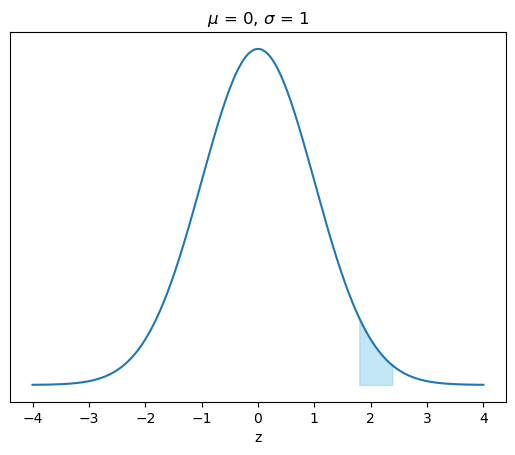

p(1.79 < z < 2.39) = 0.0283


In [312]:
question = generate_question("z")   
generate_plot(question)
print_solution("z", question)

## Finding proportions based on raw scores


        What proportion of the normal distribution corresponds to raw score values
        greater than 93


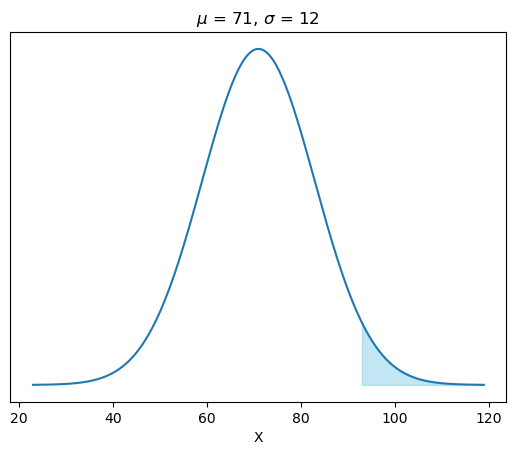

$ z = \frac{X - \mu}{\sigma}$

$ z = \frac{93 - 71}{12}$

$ z = \frac{22}{12}$

$ z = {1.83}$

p(x > 93) = 0.0336


In [313]:
# @title Click to hide code
question = generate_question("x")   
generate_plot(question)
print_solution("x", question)

# finding scores that correspond to specific proportions of the normal distribution

under development